In [1]:
from random import random
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('data.csv')
df.head(100)

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
...,...,...,...,...,...,...,...,...,...,...
95,31,7,4,3,6,1,53,3,6,1
96,16,7,5,3,6,5,82,3,6,1
97,33,5,4,3,5,6,82,3,6,1
98,0,3,5,3,6,5,47,6,7,1


In [114]:
#typy danych 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


In [118]:
#C
print(df.isnull().sum())

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64


In [120]:
y_name = "fail"
#Nazwy kolumn - do watosci shap
feature_names = df.drop(columns=[y_name]).columns
#Tworzenie zbioru treningowego i testowego
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

#Podział 80% - 20%
train_size = int(0.8 * len(df_shuffled))
df_train = df_shuffled.iloc[:train_size]
df_test = df_shuffled.iloc[train_size:]

# Podział na y i X (pozostałe) 
if y_name in df.columns:
    y_train = df_train[y_name].values
    X_shap_train = df_train.drop(columns=[y_name])
    X_train = X_shap_train.values

    y_test = df_test[y_name].values
    X_shap_test = df_test.drop(columns=[y_name])
    X_test = X_shap_test.values
#X_train = pd.DataFrame(X_train, columns=feature_names)
#X_test = pd.DataFrame(X_test, columns=feature_names)
    # Sprawdzenie
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print(type(X_test)) 
print(type(y_train))  


X_train shape: (755, 9), y_train shape: (755,)
X_test shape: (189, 9), y_test shape: (189,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [122]:
print(np.unique(y_train))  
print(np.unique(y_test))   

[0 1]
[0 1]


In [124]:
from random import random
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from RandomForestShap import RandomForestShap
import shap

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy


In [126]:
import time
import tracemalloc
from sklearn.metrics import accuracy_score

def measure_training_and_prediction(model, X_train, y_train, X_test, y_test, call_number=1):
    print(f"\n📦 Wywołanie nr {call_number}")

    # ⏱️ + 💾 Trening
    tracemalloc.start()
    start_train = time.perf_counter()
    model.fit(X_train, y_train)
    end_train = time.perf_counter()
    current_train, peak_train = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    train_time = end_train - start_train
    train_mem = peak_train / (1024 * 1024)

    # ⏱️ + 💾 Predykcja
    tracemalloc.start()
    start_pred = time.perf_counter()
    predictions = model.predict(X_test)
    end_pred = time.perf_counter()
    current_pred, peak_pred = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    pred_time = end_pred - start_pred
    pred_mem = peak_pred / (1024 * 1024)

    # 🎯 Accuracy
    acc = accuracy_score(y_test, predictions)

    # 📤 Zwracamy metryki
    results = {
        "call_number": call_number,
        "train_time_s": round(train_time, 4),
        "train_memory_mb": round(train_mem, 4),
        "predict_time_s": round(pred_time, 4),
        "predict_memory_mb": round(pred_mem, 4),
        "accuracy": round(acc, 4)
    }

    # 🖨️ Wypisz wynik
    print(f"Train: {results['train_time_s']} s, {results['train_memory_mb']} MB | "
          f"Predict: {results['predict_time_s']} s, {results['predict_memory_mb']} MB | "
          f"Accuracy: {results['accuracy']}")

    return results


In [128]:
# Funkcja do mierzenia czasu trenowania
def check_prediction_time(X_test):
    start_time = time.time()
    predictions = clf.predict(X_test)
    return time.time() - start_time


In [130]:
import time
from sklearn.ensemble import RandomForestClassifier

# Funkcja do mierzenia czasu trenowania
def check_training_time(X_train, y_train):
    start_time = time.time()
    clf = RandomForestShap(n_trees=20)
    clf.fit(X_train, y_train)
    return time.time() - start_time

# Czas przed usunięciem kolumn
time_before = check_training_time(X_train, y_train)
print(f"Czas trenowania przed: {time_before:.2f} s")


Czas trenowania przed: 1.81 s


In [132]:
clf = RandomForestShap(n_trees=20)
results_all = []
results_one = []
i = 1
for a in range (5):
    print(a)
    result = measure_training_and_prediction(clf, X_train, y_train, X_test, y_test, call_number=i)
    results_all.append(result)
    results_one.append(result)

0

📦 Wywołanie nr 1
Train: 5.7338 s, 0.6752 MB | Predict: 0.0137 s, 0.0607 MB | Accuracy: 0.9101
1

📦 Wywołanie nr 1
Train: 5.7466 s, 0.6744 MB | Predict: 0.0136 s, 0.0607 MB | Accuracy: 0.8995
2

📦 Wywołanie nr 1
Train: 5.5391 s, 0.6557 MB | Predict: 0.0133 s, 0.0607 MB | Accuracy: 0.9048
3

📦 Wywołanie nr 1
Train: 5.9033 s, 0.6731 MB | Predict: 0.0135 s, 0.0607 MB | Accuracy: 0.9101
4

📦 Wywołanie nr 1
Train: 5.7171 s, 0.6694 MB | Predict: 0.0136 s, 0.0607 MB | Accuracy: 0.9048


In [134]:
from collections import defaultdict
def average_m(results_one):
    averages = defaultdict(float)
    n = len(results_one)
    
    for result in results_one:
        for key, value in result.items():
            if key != "call_number":  # jeśli nie chcesz uśredniać tego
                averages[key] += value
    
    # Finalna średnia
    averages = {key: round(total / n, 4) for key, total in averages.items()}
    print(averages)

In [136]:
average_m(results_one)

{'train_time_s': 5.728, 'train_memory_mb': 0.6696, 'predict_time_s': 0.0135, 'predict_memory_mb': 0.0607, 'accuracy': 0.9059}


In [22]:
clf = RandomForestShap(n_trees=20)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

acc =  accuracy(y_test, predictions)
print(acc)

0.91005291005291


In [34]:
# Czas przed usunięciem kolumn
train_times = []

for a in range(5):
    time_before = check_training_time(X_train, y_train)
    train_times.append(time_before)
    print(f"Czas trenowania przed: {time_before:.2f} s")

# Średnia
avg_time = sum(train_times) / len(train_times)
print(f"Średni czas trenowania: {avg_time:.2f} s")

Czas trenowania przed: 1.83 s
Czas trenowania przed: 1.71 s
Czas trenowania przed: 1.77 s
Czas trenowania przed: 1.74 s
Czas trenowania przed: 1.72 s
Średni czas trenowania: 1.76 s


In [24]:
import shap

# Używamy funkcji predict jako modelu
explainer = shap.Explainer(clf.predict, X_train, algorithm="permutation")

# Obliczamy wartości SHAP dla danych testowych
shap_values = explainer(X_test)


PermutationExplainer explainer: 190it [04:05,  1.34s/it]                         


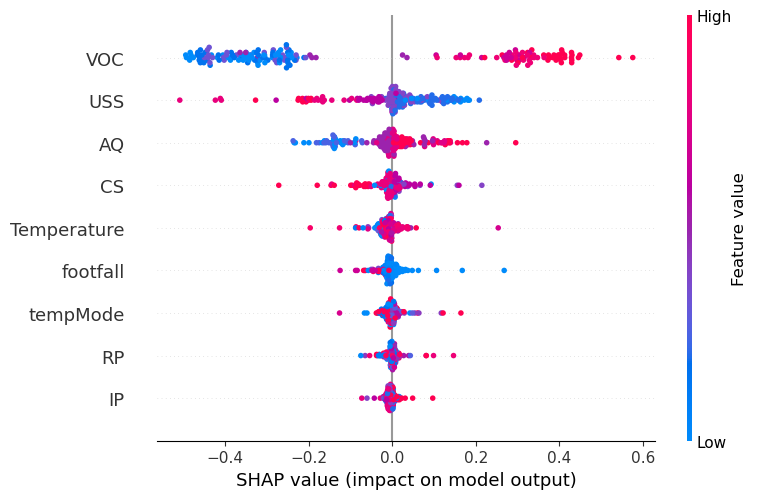

In [26]:
feature_names = X_shap_train.columns
shap.summary_plot(shap_values, X_test, feature_names=feature_names)


In [28]:
#ranking cech - srednia wartosc SHAP
mean_abs = np.abs(shap_values.values).mean(axis=0)
feature_importance = pd.DataFrame({
    'Feature':[f"{i}" for i in (feature_names)], 'Mean SHAP value' : mean_abs})
feature_importance = feature_importance.sort_values('Mean SHAP value', ascending=False)

print(feature_importance)

       Feature  Mean SHAP value
5          VOC         0.333887
3          USS         0.081285
2           AQ         0.063899
4           CS         0.028702
8  Temperature         0.020219
0     footfall         0.018091
1     tempMode         0.013934
6           RP         0.010577
7           IP         0.009079


In [138]:
#Usuwanie kolumny Parch
X_shap_test = X_shap_test.drop(columns=['IP'])
X_shap_train = X_shap_train.drop(columns=['IP'])
X_train = X_shap_train.values
X_test = X_shap_test.values

In [140]:
results_one = []
i +=1
for a in range (5):
    print(a)
    result = measure_training_and_prediction(clf, X_train, y_train, X_test, y_test, call_number=i)
    results_all.append(result)
    results_one.append(result)

0

📦 Wywołanie nr 2
Train: 5.3922 s, 0.6725 MB | Predict: 0.0137 s, 0.0607 MB | Accuracy: 0.8995
1

📦 Wywołanie nr 2
Train: 5.2542 s, 0.6549 MB | Predict: 0.0135 s, 0.0607 MB | Accuracy: 0.8889
2

📦 Wywołanie nr 2
Train: 5.4344 s, 0.6562 MB | Predict: 0.0136 s, 0.0607 MB | Accuracy: 0.8942
3

📦 Wywołanie nr 2
Train: 5.4632 s, 0.6834 MB | Predict: 0.0138 s, 0.0607 MB | Accuracy: 0.8942
4

📦 Wywołanie nr 2
Train: 5.431 s, 0.6441 MB | Predict: 0.0136 s, 0.0607 MB | Accuracy: 0.8942


In [142]:
average_m(results_one)

{'train_time_s': 5.395, 'train_memory_mb': 0.6622, 'predict_time_s': 0.0136, 'predict_memory_mb': 0.0607, 'accuracy': 0.8942}


In [46]:
# Czas po usunięciem kolumn
train_times = []

for a in range(5):
    time_before = check_training_time(X_train, y_train)
    train_times.append(time_before)
    print(f"Czas trenowania po: {time_before:.2f} s")

# Średnia
avg_time = sum(train_times) / len(train_times)
print(f"Średni czas trenowania: {avg_time:.2f} s")

Czas trenowania po: 1.70 s
Czas trenowania po: 1.62 s
Czas trenowania po: 1.62 s
Czas trenowania po: 1.62 s
Czas trenowania po: 1.64 s
Średni czas trenowania: 1.64 s


In [34]:
#Kolejna predykcja
clf_2 = RandomForestShap(n_trees=20)
clf_2.fit(X_train, y_train)
predictions_2 = clf_2.predict(X_test)

acc =  accuracy(y_test, predictions_2)
print(acc)

0.8994708994708994


In [ ]:
# Czas przed usunięciem kolumn
time_pred_before = check_prediction_time(X_test)
print(f"Czas predykcji po: {time_pred_before:.2f} s")


In [36]:
# Używamy funkcji predict jako modelu
explainer = shap.Explainer(clf_2.predict, X_train, algorithm="permutation")

# Obliczamy wartości SHAP dla danych testowych
shap_values = explainer(X_test)


PermutationExplainer explainer: 190it [03:55,  1.30s/it]                         


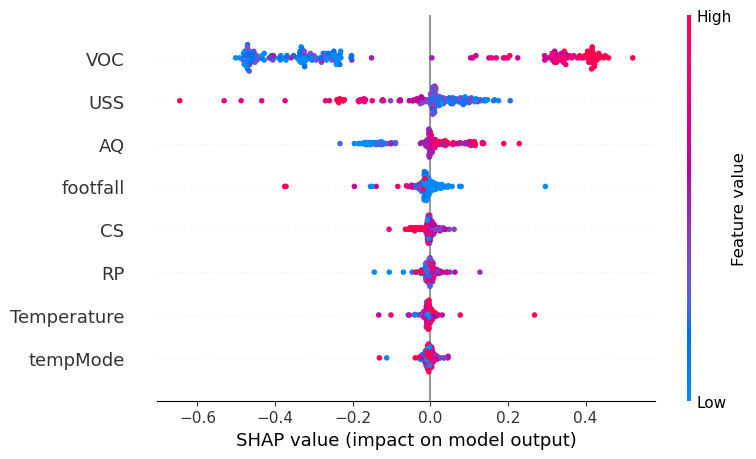

In [38]:
feature_names = X_shap_train.columns
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

In [40]:
#ranking cech - srednia wartosc SHAP
mean_abs = np.abs(shap_values.values).mean(axis=0)
feature_importance = pd.DataFrame({
    'Feature':[f"{i}" for i in (feature_names)], 'Mean SHAP value' : mean_abs})
feature_importance = feature_importance.sort_values('Mean SHAP value', ascending=False)

print(feature_importance)

       Feature  Mean SHAP value
5          VOC         0.351502
3          USS         0.078767
2           AQ         0.059670
0     footfall         0.025463
4           CS         0.012918
6           RP         0.011509
7  Temperature         0.011366
1     tempMode         0.010263


In [144]:
#Usuwanie kolumny Parch
X_shap_test = X_shap_test.drop(columns=['tempMode'])
X_shap_train = X_shap_train.drop(columns=['tempMode'])
X_train = X_shap_train.values
X_test = X_shap_test.values


In [146]:
print(X_train.shape)  # Sprawdzamy rozmiar danych po usunięciu kolumn
print(X_test.shape)   # To samo dla danych testowych


(755, 7)
(189, 7)


In [148]:
results_one = []
i +=1
for a in range (5):
    print(a)
    result = measure_training_and_prediction(clf, X_train, y_train, X_test, y_test, call_number=i)
    results_all.append(result)
    results_one.append(result)

0

📦 Wywołanie nr 3
Train: 5.0676 s, 0.642 MB | Predict: 0.0134 s, 0.0607 MB | Accuracy: 0.9101
1

📦 Wywołanie nr 3
Train: 5.0774 s, 0.68 MB | Predict: 0.0136 s, 0.0607 MB | Accuracy: 0.8889
2

📦 Wywołanie nr 3
Train: 4.9111 s, 0.6265 MB | Predict: 0.0133 s, 0.0607 MB | Accuracy: 0.9101
3

📦 Wywołanie nr 3
Train: 5.0765 s, 0.6442 MB | Predict: 0.0137 s, 0.0607 MB | Accuracy: 0.8889
4

📦 Wywołanie nr 3
Train: 5.0012 s, 0.6563 MB | Predict: 0.0139 s, 0.0607 MB | Accuracy: 0.9048


In [150]:
average_m(results_one)

{'train_time_s': 5.0268, 'train_memory_mb': 0.6498, 'predict_time_s': 0.0136, 'predict_memory_mb': 0.0607, 'accuracy': 0.9006}


In [56]:
# Czas przed usunięciem kolumn
train_times = []

for a in range(5):
    time_before = check_training_time(X_train, y_train)
    train_times.append(time_before)
    print(f"Czas trenowania przed: {time_before:.2f} s")

# Średnia
avg_time = sum(train_times) / len(train_times)
print(f"Średni czas trenowania: {avg_time:.2f} s")

Czas trenowania przed: 1.59 s
Czas trenowania przed: 1.59 s
Czas trenowania przed: 1.54 s
Czas trenowania przed: 1.56 s
Czas trenowania przed: 1.54 s
Średni czas trenowania: 1.56 s


In [48]:
#Kolejna predykcja
clf_3 = RandomForestShap(n_trees=20)
clf_3.fit(X_train, y_train)
predictions_3 = clf_3.predict(X_test)

acc =  accuracy(y_test, predictions_3)
print(acc)

0.8941798941798942


In [ ]:
# Czas przed usunięciem kolumn
time_pred_before = check_prediction_time(X_test)
print(f"Czas predykcji po: {time_pred_before:.2f} s")


In [50]:
# Używamy funkcji predict jako modelu
explainer = shap.Explainer(clf_3.predict, X_train, algorithm="permutation")

# Obliczamy wartości SHAP dla danych testowych
shap_values = explainer(X_test)


PermutationExplainer explainer: 190it [04:02,  1.33s/it]                         


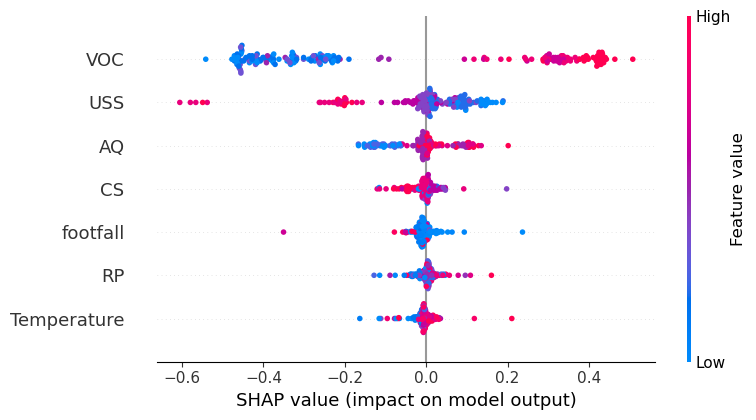

In [52]:
feature_names = X_shap_train.columns
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

In [54]:
#ranking cech - srednia wartosc SHAP
mean_abs = np.abs(shap_values.values).mean(axis=0)
feature_importance = pd.DataFrame({
    'Feature':[f"{i}" for i in (feature_names)], 'Mean SHAP value' : mean_abs})
feature_importance = feature_importance.sort_values('Mean SHAP value', ascending=False)

print(feature_importance)

       Feature  Mean SHAP value
4          VOC         0.351186
2          USS         0.086866
1           AQ         0.050014
3           CS         0.019897
0     footfall         0.016558
5           RP         0.016215
6  Temperature         0.016193


In [152]:
#Usuwanie kolumny Parch
X_shap_test = X_shap_test.drop(columns=['Temperature'])
X_shap_train = X_shap_train.drop(columns=['Temperature'])
X_train = X_shap_train.values
X_test = X_shap_test.values


In [154]:
results_one = []
i +=1
for a in range (5):
    print(a)
    result = measure_training_and_prediction(clf, X_train, y_train, X_test, y_test, call_number=i)
    results_all.append(result)
    results_one.append(result)

0

📦 Wywołanie nr 4
Train: 4.3495 s, 0.6596 MB | Predict: 0.0142 s, 0.0607 MB | Accuracy: 0.8995
1

📦 Wywołanie nr 4
Train: 4.2618 s, 0.6487 MB | Predict: 0.0139 s, 0.0607 MB | Accuracy: 0.9206
2

📦 Wywołanie nr 4
Train: 4.3074 s, 0.6241 MB | Predict: 0.0138 s, 0.0607 MB | Accuracy: 0.9101
3

📦 Wywołanie nr 4
Train: 4.3201 s, 0.6714 MB | Predict: 0.0139 s, 0.0607 MB | Accuracy: 0.8995
4

📦 Wywołanie nr 4
Train: 4.041 s, 0.631 MB | Predict: 0.0136 s, 0.0607 MB | Accuracy: 0.9206


In [156]:
average_m(results_one)

{'train_time_s': 4.256, 'train_memory_mb': 0.647, 'predict_time_s': 0.0139, 'predict_memory_mb': 0.0607, 'accuracy': 0.9101}


In [66]:
# Czas przed usunięciem kolumn
train_times = []

for a in range(5):
    time_before = check_training_time(X_train, y_train)
    train_times.append(time_before)
    print(f"Czas trenowania przed: {time_before:.2f} s")

# Średnia
avg_time = sum(train_times) / len(train_times)
print(f"Średni czas trenowania: {avg_time:.2f} s")

Czas trenowania przed: 1.41 s
Czas trenowania przed: 1.34 s
Czas trenowania przed: 1.35 s
Czas trenowania przed: 1.31 s
Czas trenowania przed: 1.31 s
Średni czas trenowania: 1.34 s


In [60]:
#Kolejna predykcja
clf_4 = RandomForestShap(n_trees=20)
clf_4.fit(X_train, y_train)
predictions_4 = clf_4.predict(X_test)

acc =  accuracy(y_test, predictions_4)
print(acc)

0.9047619047619048


In [ ]:
# Czas przed usunięciem kolumn
time_pred_before = check_prediction_time(X_test)
print(f"Czas predykcji po: {time_pred_before:.2f} s")


In [76]:
# Używamy funkcji predict jako modelu
explainer = shap.Explainer(clf_4.predict, X_train, algorithm="permutation")

# Obliczamy wartości SHAP dla danych testowych
shap_values = explainer(X_test)


PermutationExplainer explainer: 190it [04:06,  1.35s/it]                         


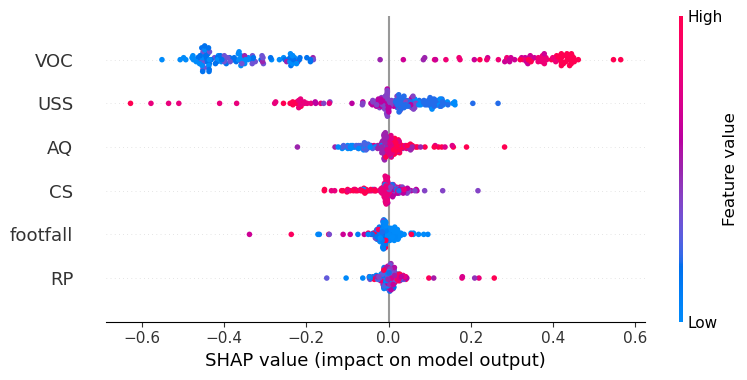

In [78]:
feature_names = X_shap_train.columns
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

In [80]:
#ranking cech - srednia wartosc SHAP
mean_abs = np.abs(shap_values.values).mean(axis=0)
feature_importance = pd.DataFrame({
    'Feature':[f"{i}" for i in (feature_names)], 'Mean SHAP value' : mean_abs})
feature_importance = feature_importance.sort_values('Mean SHAP value', ascending=False)

print(feature_importance)

    Feature  Mean SHAP value
4       VOC         0.359466
2       USS         0.090844
1        AQ         0.038307
3        CS         0.028174
0  footfall         0.024572
5        RP         0.021624


In [158]:
#Usuwanie kolumny Parch
X_shap_test = X_shap_test.drop(columns=['RP'])
X_shap_train = X_shap_train.drop(columns=['RP'])
X_train = X_shap_train.values
X_test = X_shap_test.values


In [162]:
results_one = []
i +=1
for a in range (5):
    print(a)
    result = measure_training_and_prediction(clf, X_train, y_train, X_test, y_test, call_number=i)
    results_all.append(result)
    results_one.append(result)

0

📦 Wywołanie nr 6
Train: 2.7859 s, 0.6769 MB | Predict: 0.014 s, 0.0607 MB | Accuracy: 0.9101
1

📦 Wywołanie nr 6
Train: 2.71 s, 0.7034 MB | Predict: 0.0137 s, 0.0607 MB | Accuracy: 0.9101
2

📦 Wywołanie nr 6
Train: 2.7396 s, 0.6818 MB | Predict: 0.0147 s, 0.0607 MB | Accuracy: 0.9153
3

📦 Wywołanie nr 6
Train: 2.7146 s, 0.6989 MB | Predict: 0.0137 s, 0.0607 MB | Accuracy: 0.9153
4

📦 Wywołanie nr 6
Train: 2.7533 s, 0.7194 MB | Predict: 0.0142 s, 0.0607 MB | Accuracy: 0.9048


In [164]:
average_m(results_one)

{'train_time_s': 2.7407, 'train_memory_mb': 0.6961, 'predict_time_s': 0.0141, 'predict_memory_mb': 0.0607, 'accuracy': 0.9111}


In [74]:
# Czas przed usunięciem kolumn
train_times = []

for a in range(5):
    time_before = check_training_time(X_train, y_train)
    train_times.append(time_before)
    print(f"Czas trenowania przed: {time_before:.2f} s")

# Średnia
avg_time = sum(train_times) / len(train_times)
print(f"Średni czas trenowania: {avg_time:.2f} s")

Czas trenowania przed: 0.91 s
Czas trenowania przed: 0.84 s
Czas trenowania przed: 0.84 s
Czas trenowania przed: 0.82 s
Czas trenowania przed: 0.87 s
Średni czas trenowania: 0.86 s


In [30]:
#Kolejna predykcja
clf_5 = RandomForestShap(n_trees=20)
clf_5.fit(X_train, y_train)
predictions_5 = clf_5.predict(X_test)

acc =  accuracy(y_test, predictions_5)
print(acc)

0.91005291005291


In [ ]:
# Czas przed usunięciem kolumn
time_pred_before = check_prediction_time(X_test)
print(f"Czas predykcji po: {time_pred_before:.2f} s")


In [32]:
# Używamy funkcji predict jako modelu
explainer = shap.Explainer(clf_5.predict, X_train, algorithm="permutation")

# Obliczamy wartości SHAP dla danych testowych
shap_values = explainer(X_test)


PermutationExplainer explainer: 190it [04:49,  1.56s/it]                         


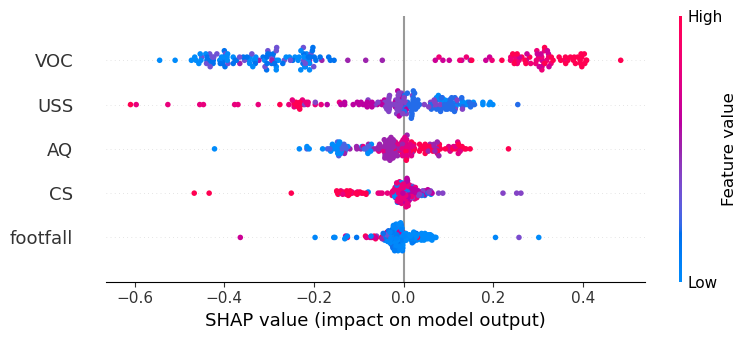

In [34]:
feature_names = X_shap_train.columns
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

In [36]:
#ranking cech - srednia wartosc SHAP
mean_abs = np.abs(shap_values.values).mean(axis=0)
feature_importance = pd.DataFrame({
    'Feature':[f"{i}" for i in (feature_names)], 'Mean SHAP value' : mean_abs})
feature_importance = feature_importance.sort_values('Mean SHAP value', ascending=False)

print(feature_importance)

    Feature  Mean SHAP value
4       VOC         0.305985
2       USS         0.101143
1        AQ         0.071156
3        CS         0.043704
0  footfall         0.036895


In [166]:
#Usuwanie kolumny Parch
X_shap_test = X_shap_test.drop(columns=['footfall'])
X_shap_train = X_shap_train.drop(columns=['footfall'])
X_train = X_shap_train.values
X_test = X_shap_test.values


In [168]:
results_one = []
i +=1
for a in range (5):
    print(a)
    result = measure_training_and_prediction(clf, X_train, y_train, X_test, y_test, call_number=i)
    results_all.append(result)
    results_one.append(result)

0

📦 Wywołanie nr 7
Train: 1.248 s, 0.7718 MB | Predict: 0.0147 s, 0.0607 MB | Accuracy: 0.9153
1

📦 Wywołanie nr 7
Train: 1.1612 s, 0.7581 MB | Predict: 0.0153 s, 0.0607 MB | Accuracy: 0.9259
2

📦 Wywołanie nr 7
Train: 1.1848 s, 0.7646 MB | Predict: 0.0148 s, 0.0607 MB | Accuracy: 0.9153
3

📦 Wywołanie nr 7
Train: 1.1816 s, 0.7531 MB | Predict: 0.0145 s, 0.0607 MB | Accuracy: 0.9101
4

📦 Wywołanie nr 7
Train: 1.1671 s, 0.7685 MB | Predict: 0.0145 s, 0.0607 MB | Accuracy: 0.9259


In [170]:
average_m(results_one)

{'train_time_s': 1.1885, 'train_memory_mb': 0.7632, 'predict_time_s': 0.0148, 'predict_memory_mb': 0.0607, 'accuracy': 0.9185}


In [82]:
# Czas przed usunięciem kolumn
train_times = []

for a in range(5):
    time_before = check_training_time(X_train, y_train)
    train_times.append(time_before)
    print(f"Czas trenowania przed: {time_before:.2f} s")

# Średnia
avg_time = sum(train_times) / len(train_times)
print(f"Średni czas trenowania: {avg_time:.2f} s")

Czas trenowania przed: 0.38 s
Czas trenowania przed: 0.37 s
Czas trenowania przed: 0.35 s
Czas trenowania przed: 0.35 s
Czas trenowania przed: 0.36 s
Średni czas trenowania: 0.36 s


In [40]:
#Kolejna predykcja
clf_4 = RandomForestShap(n_trees=20)
clf_4.fit(X_train, y_train)
predictions_4 = clf_4.predict(X_test)

acc =  accuracy(y_test, predictions_4)
print(acc)

0.91005291005291


In [ ]:
# Czas przed usunięciem kolumn
time_pred_before = check_prediction_time(X_test)
print(f"Czas predykcji po: {time_pred_before:.2f} s")


In [42]:
# Używamy funkcji predict jako modelu
explainer = shap.Explainer(clf_4.predict, X_train, algorithm="permutation")

# Obliczamy wartości SHAP dla danych testowych
shap_values = explainer(X_test)


PermutationExplainer explainer: 190it [04:06,  1.36s/it]                         


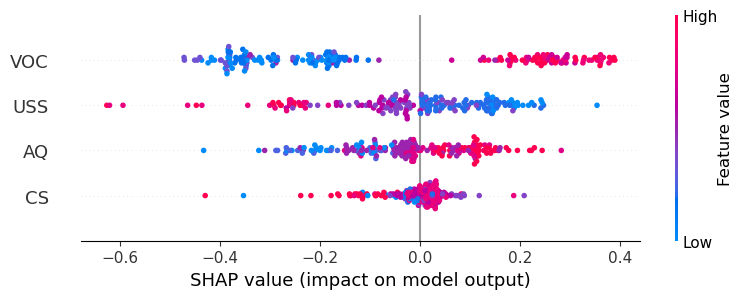

In [44]:
feature_names = X_shap_train.columns
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

In [46]:
#ranking cech - srednia wartosc SHAP
mean_abs = np.abs(shap_values.values).mean(axis=0)
feature_importance = pd.DataFrame({
    'Feature':[f"{i}" for i in (feature_names)], 'Mean SHAP value' : mean_abs})
feature_importance = feature_importance.sort_values('Mean SHAP value', ascending=False)

print(feature_importance)

  Feature  Mean SHAP value
3     VOC         0.275816
1     USS         0.126620
0      AQ         0.104924
2      CS         0.046403


In [172]:
#Usuwanie kolumny Parch
X_shap_test = X_shap_test.drop(columns=['CS'])
X_shap_train = X_shap_train.drop(columns=['CS'])
X_train = X_shap_train.values
X_test = X_shap_test.values


In [174]:
results_one = []
i +=1
for a in range (5):
    print(a)
    result = measure_training_and_prediction(clf, X_train, y_train, X_test, y_test, call_number=i)
    results_all.append(result)
    results_one.append(result)

0

📦 Wywołanie nr 8
Train: 0.981 s, 0.9207 MB | Predict: 0.0161 s, 0.0607 MB | Accuracy: 0.9153
1

📦 Wywołanie nr 8
Train: 0.9201 s, 0.924 MB | Predict: 0.0162 s, 0.0607 MB | Accuracy: 0.9048
2

📦 Wywołanie nr 8
Train: 0.9 s, 0.9095 MB | Predict: 0.0159 s, 0.0607 MB | Accuracy: 0.8995
3

📦 Wywołanie nr 8
Train: 0.8929 s, 0.9214 MB | Predict: 0.0154 s, 0.0607 MB | Accuracy: 0.9101
4

📦 Wywołanie nr 8
Train: 0.923 s, 0.9408 MB | Predict: 0.0154 s, 0.0607 MB | Accuracy: 0.9101


In [176]:
average_m(results_one)

{'train_time_s': 0.9234, 'train_memory_mb': 0.9233, 'predict_time_s': 0.0158, 'predict_memory_mb': 0.0607, 'accuracy': 0.908}


In [90]:
# Czas przed usunięciem kolumn
train_times = []

for a in range(5):
    time_before = check_training_time(X_train, y_train)
    train_times.append(time_before)
    print(f"Czas trenowania przed: {time_before:.2f} s")

# Średnia
avg_time = sum(train_times) / len(train_times)
print(f"Średni czas trenowania: {avg_time:.2f} s")

Czas trenowania przed: 0.31 s
Czas trenowania przed: 0.31 s
Czas trenowania przed: 0.34 s
Czas trenowania przed: 0.29 s
Czas trenowania przed: 0.29 s
Średni czas trenowania: 0.31 s


In [50]:
#Kolejna predykcja
clf_6 = RandomForestShap(n_trees=20)
clf_6.fit(X_train, y_train)
predictions_6 = clf_6.predict(X_test)

acc =  accuracy(y_test, predictions_6)
print(acc)

0.9047619047619048


In [ ]:
# Czas przed usunięciem kolumn
time_pred_before = check_prediction_time(X_test)
print(f"Czas predykcji po: {time_pred_before:.2f} s")


In [52]:
# Używamy funkcji predict jako modelu
explainer = shap.Explainer(clf_6.predict, X_train, algorithm="permutation")

# Obliczamy wartości SHAP dla danych testowych
shap_values = explainer(X_test)


PermutationExplainer explainer: 190it [04:24,  1.46s/it]                         


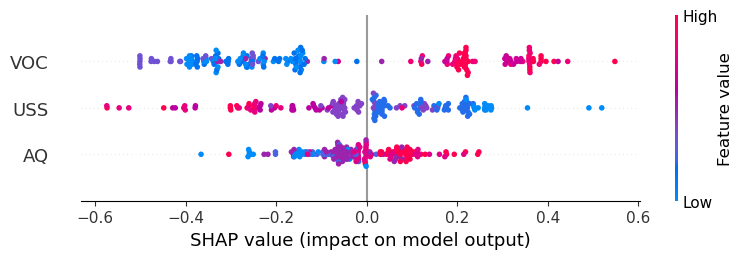

In [54]:
feature_names = X_shap_train.columns
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

In [56]:
#ranking cech - srednia wartosc SHAP
mean_abs = np.abs(shap_values.values).mean(axis=0)
feature_importance = pd.DataFrame({
    'Feature':[f"{i}" for i in (feature_names)], 'Mean SHAP value' : mean_abs})
feature_importance = feature_importance.sort_values('Mean SHAP value', ascending=False)

print(feature_importance)

  Feature  Mean SHAP value
2     VOC         0.274785
1     USS         0.159680
0      AQ         0.085834


In [178]:
#Usuwanie kolumny Parch
X_shap_test = X_shap_test.drop(columns=['AQ'])
X_shap_train = X_shap_train.drop(columns=['AQ'])
X_train = X_shap_train.values
X_test = X_shap_test.values


In [180]:
results_one = []
i +=1
for a in range (5):
    print(a)
    result = measure_training_and_prediction(clf, X_train, y_train, X_test, y_test, call_number=i)
    results_all.append(result)
    results_one.append(result)

0

📦 Wywołanie nr 9
Train: 0.633 s, 1.1253 MB | Predict: 0.0188 s, 0.0607 MB | Accuracy: 0.8995
1

📦 Wywołanie nr 9
Train: 0.5789 s, 0.9722 MB | Predict: 0.0173 s, 0.0607 MB | Accuracy: 0.8995
2

📦 Wywołanie nr 9
Train: 0.5724 s, 0.9691 MB | Predict: 0.0167 s, 0.0607 MB | Accuracy: 0.8995
3

📦 Wywołanie nr 9
Train: 0.5585 s, 0.9581 MB | Predict: 0.0172 s, 0.0607 MB | Accuracy: 0.8995
4

📦 Wywołanie nr 9
Train: 0.5623 s, 0.9567 MB | Predict: 0.0168 s, 0.0607 MB | Accuracy: 0.8995


In [182]:
average_m(results_one)

{'train_time_s': 0.581, 'train_memory_mb': 0.9963, 'predict_time_s': 0.0174, 'predict_memory_mb': 0.0607, 'accuracy': 0.8995}


In [98]:
# Czas przed usunięciem kolumn
train_times = []

for a in range(5):
    time_before = check_training_time(X_train, y_train)
    train_times.append(time_before)
    print(f"Czas trenowania przed: {time_before:.2f} s")

# Średnia
avg_time = sum(train_times) / len(train_times)
print(f"Średni czas trenowania: {avg_time:.2f} s")

Czas trenowania przed: 0.20 s
Czas trenowania przed: 0.19 s
Czas trenowania przed: 0.19 s
Czas trenowania przed: 0.19 s
Czas trenowania przed: 0.18 s
Średni czas trenowania: 0.19 s


In [72]:
#Kolejna predykcja
clf_7 = RandomForestShap(n_trees=20)
clf_7.fit(X_train, y_train)
predictions_7 = clf_7.predict(X_test)

acc =  accuracy(y_test, predictions_7)
print(acc)

0.9153439153439153


In [ ]:
# Czas przed usunięciem kolumn
time_pred_before = check_prediction_time(X_test)
print(f"Czas predykcji po: {time_pred_before:.2f} s")


In [184]:
#Usuwanie kolumny Parch
X_shap_test = X_shap_test.drop(columns=['USS'])
X_shap_train = X_shap_train.drop(columns=['USS'])
X_train = X_shap_train.values
X_test = X_shap_test.values


In [186]:
results_one = []
i +=1
for a in range (5):
    print(a)
    result = measure_training_and_prediction(clf, X_train, y_train, X_test, y_test, call_number=i)
    results_all.append(result)
    results_one.append(result)

0

📦 Wywołanie nr 10
Train: 0.2045 s, 0.5742 MB | Predict: 0.0241 s, 0.0607 MB | Accuracy: 0.9153
1

📦 Wywołanie nr 10
Train: 0.1835 s, 0.5737 MB | Predict: 0.0241 s, 0.0607 MB | Accuracy: 0.9153
2

📦 Wywołanie nr 10
Train: 0.1869 s, 0.5769 MB | Predict: 0.0243 s, 0.0607 MB | Accuracy: 0.9153
3

📦 Wywołanie nr 10
Train: 0.2266 s, 0.5814 MB | Predict: 0.0224 s, 0.0607 MB | Accuracy: 0.9153
4

📦 Wywołanie nr 10
Train: 0.168 s, 0.572 MB | Predict: 0.0216 s, 0.0607 MB | Accuracy: 0.9153


In [188]:
average_m(results_one)

{'train_time_s': 0.1939, 'train_memory_mb': 0.5756, 'predict_time_s': 0.0233, 'predict_memory_mb': 0.0607, 'accuracy': 0.9153}


In [106]:
# Czas przed usunięciem kolumn
train_times = []

for a in range(5):
    time_before = check_training_time(X_train, y_train)
    train_times.append(time_before)
    print(f"Czas trenowania przed: {time_before:.2f} s")

# Średnia
avg_time = sum(train_times) / len(train_times)
print(f"Średni czas trenowania: {avg_time:.2f} s")

Czas trenowania przed: 0.06 s
Czas trenowania przed: 0.06 s
Czas trenowania przed: 0.06 s
Czas trenowania przed: 0.06 s
Czas trenowania przed: 0.06 s
Średni czas trenowania: 0.06 s


In [82]:
X_shap_test.columns


Index(['VOC'], dtype='object')

In [108]:
#Kolejna predykcja
clf_7 = RandomForestShap(n_trees=20)
clf_7.fit(X_train, y_train)
predictions_7 = clf_7.predict(X_test)

acc =  accuracy(y_test, predictions_7)
print(acc)

0.9153439153439153
